### Hierarchical Clustering - Demographics

In [1]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd
from sklearn import preprocessing

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [2]:
!ls *.pkl

AgeSexRace.pkl	econ.pkl


In [7]:
demog = pd.read_pickle('AgeSexRace.pkl')
demog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 1 to 570
Data columns (total 33 columns):
FIPS             570 non-null object
city_town        570 non-null object
p_malepop        570 non-null float64
p_ageless5       570 non-null float64
p_age5to9        570 non-null float64
p_age10to14      570 non-null float64
p_age15to19      570 non-null float64
p_age20to24      570 non-null float64
p_age25to34      570 non-null float64
p_age35to44      570 non-null float64
p_age45to54      570 non-null float64
p_age55to59      570 non-null float64
p_age60to64      570 non-null float64
p_age65to74      570 non-null float64
p_age75to84      570 non-null float64
p_ageover85      570 non-null float64
p_white          570 non-null float64
p_black          570 non-null float64
p_amind          570 non-null float64
p_asian          570 non-null float64
p_asian_ind      570 non-null float64
p_as_chin        570 non-null float64
p_as_filip       570 non-null float64
p_as_jap         570 no

In [6]:
s =pd.DataFrame([x.split(sep=',') for x in demog['city_town']])
s.columns = ['town','county','state']
s.info()
#s[161:166]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 3 columns):
town      570 non-null object
county    570 non-null object
state     570 non-null object
dtypes: object(3)
memory usage: 13.4+ KB


In [9]:
X = demog.loc[:,'p_ageless5':'p_ageover85']
X=X.set_index(s['town'])
X.ix[520]

p_ageless5      4.5
p_age5to9       8.7
p_age10to14     8.0
p_age15to19    10.3
p_age20to24     5.0
p_age25to34     6.4
p_age35to44    15.1
p_age45to54    20.0
p_age55to59     6.7
p_age60to64     4.7
p_age65to74     6.1
p_age75to84     3.0
p_ageover85     1.5
Name: Sparta township, dtype: float64

In [10]:
X = X[X['p_age45to54'] != 0]
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 563 entries, Absecon city to White township
Data columns (total 13 columns):
p_ageless5     563 non-null float64
p_age5to9      563 non-null float64
p_age10to14    563 non-null float64
p_age15to19    563 non-null float64
p_age20to24    563 non-null float64
p_age25to34    563 non-null float64
p_age35to44    563 non-null float64
p_age45to54    563 non-null float64
p_age55to59    563 non-null float64
p_age60to64    563 non-null float64
p_age65to74    563 non-null float64
p_age75to84    563 non-null float64
p_ageover85    563 non-null float64
dtypes: float64(13)
memory usage: 61.6+ KB


In [11]:
X_scaled = preprocessing.scale(X)

X_scaled[520:521,:]    

array([[ 0.15273,  0.70721,  0.84458, -0.1499 , -0.66718, -1.0214 ,
         0.05136,  0.18958,  0.9768 , -0.28567, -0.10076,  0.12793,
         0.64469]])

In [12]:
methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']

for m in methods:
    Z = linkage(X_scaled, m)
    c, coph_dists = cophenet(Z, pdist(X))
    print(m,": ", c)

#    c, coph_dists = cophenet(Z, pdist(X))
#c
#coph_dists
#c

single :  0.757061309152
complete :  0.661078911247
average :  0.851073842112
weighted :  0.799438511674
centroid :  0.831882359483
median :  0.769020250864
ward :  0.575365224664


In [17]:
Z = linkage(X_scaled, 'ward')

In [18]:
Z[:10]

array([[ 199.     ,  200.     ,    0.60595,    2.     ],
       [ 213.     ,  293.     ,    0.61172,    2.     ],
       [ 310.     ,  523.     ,    0.67752,    2.     ],
       [  66.     ,  377.     ,    0.76624,    2.     ],
       [ 245.     ,  446.     ,    0.76889,    2.     ],
       [ 204.     ,  251.     ,    0.77751,    2.     ],
       [ 105.     ,  238.     ,    0.78155,    2.     ],
       [ 352.     ,  459.     ,    0.78867,    2.     ],
       [ 355.     ,  521.     ,    0.80259,    2.     ],
       [ 299.     ,  483.     ,    0.82265,    2.     ]])

In [19]:
Z[-10:]

array([[ 1076.     ,  1112.     ,    14.7228 ,   155.     ],
       [ 1110.     ,  1111.     ,    16.22718,    37.     ],
       [   77.     ,  1116.     ,    17.53436,    38.     ],
       [ 1093.     ,  1114.     ,    17.78581,   167.     ],
       [ 1101.     ,  1104.     ,    18.78967,    46.     ],
       [  164.     ,  1117.     ,    19.39186,    39.     ],
       [ 1115.     ,  1119.     ,    20.42936,   201.     ],
       [ 1113.     ,  1118.     ,    24.91564,   323.     ],
       [ 1121.     ,  1122.     ,    39.09546,   524.     ],
       [ 1120.     ,  1123.     ,    54.98118,   563.     ]])

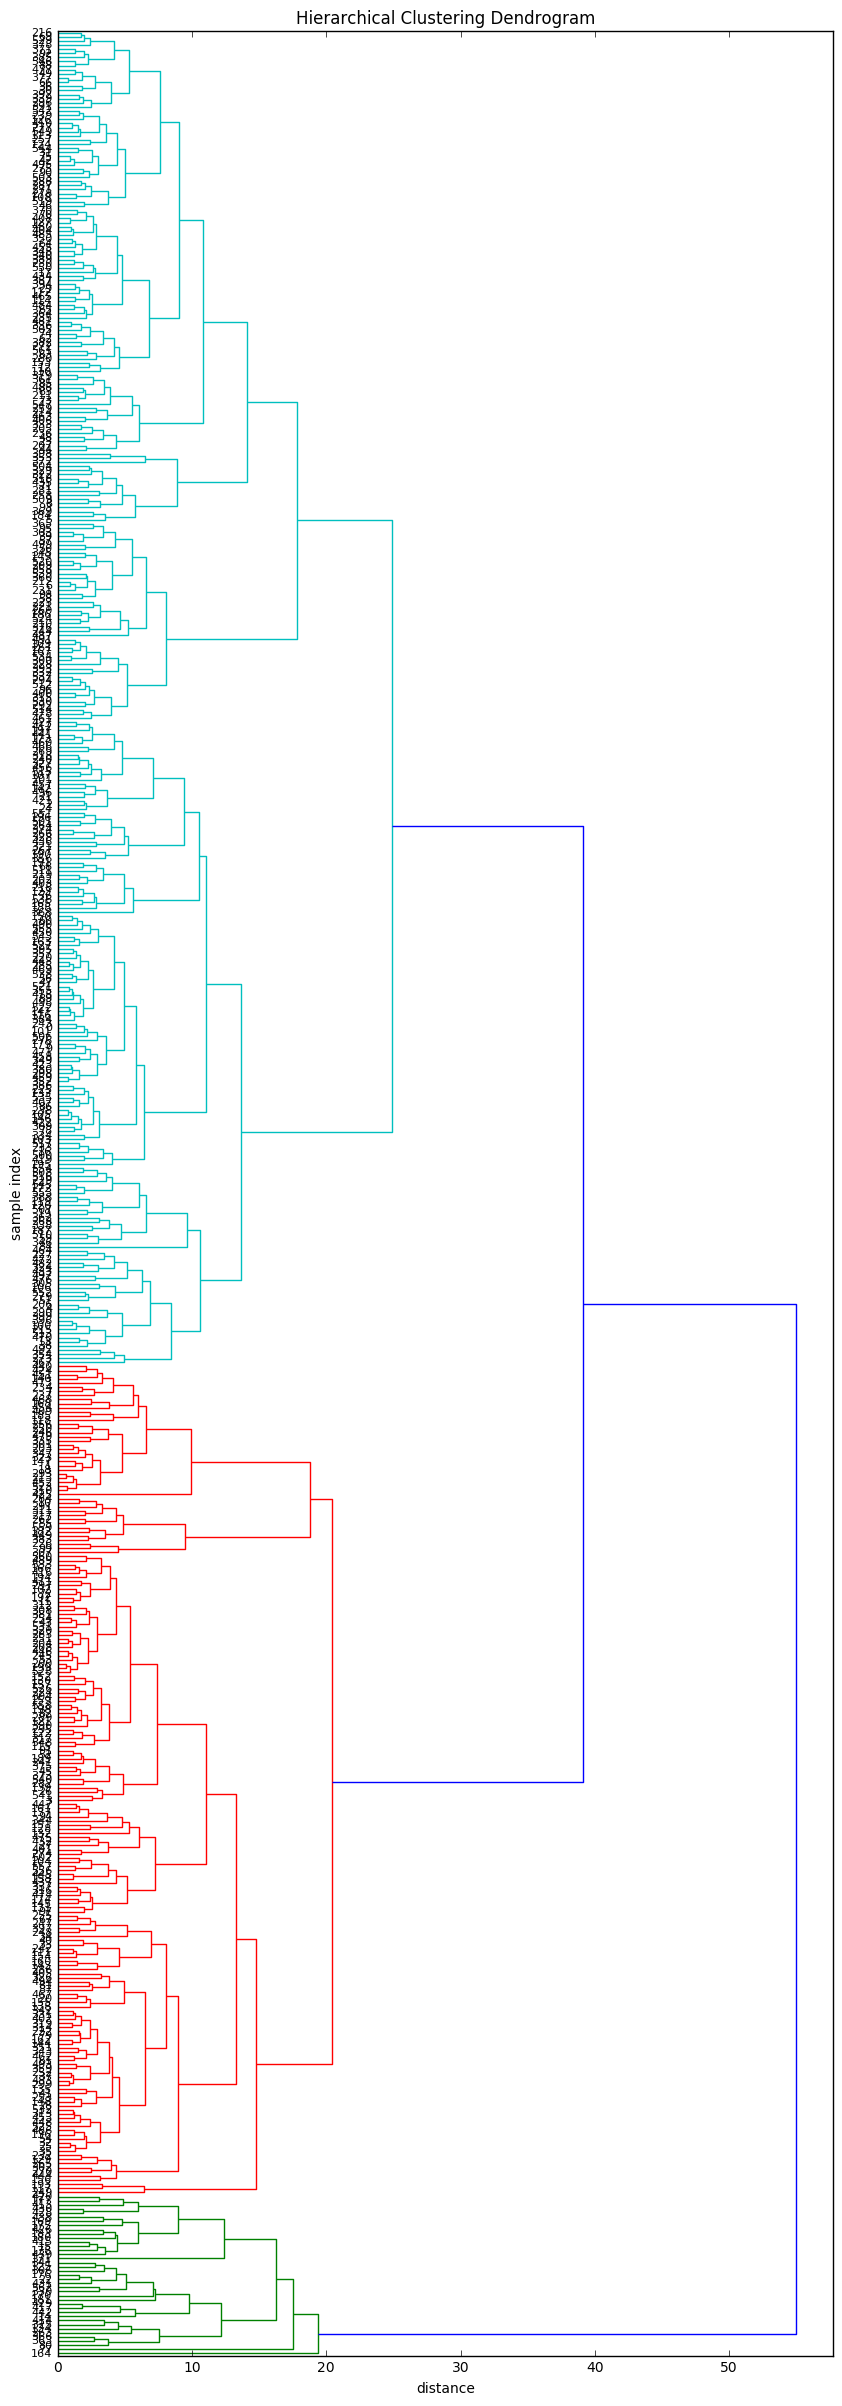

In [20]:
# calculate full dendrogram
plt.figure(figsize=(10, 30))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('sample index')
plt.xlabel('distance')
dendrogram(
    Z,
    orientation='right',
#    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()


In [21]:
Z[-10:,2]

array([ 14.7228 ,  16.22718,  17.53436,  17.78581,  18.78967,  19.39186,
        20.42936,  24.91564,  39.09546,  54.98118])

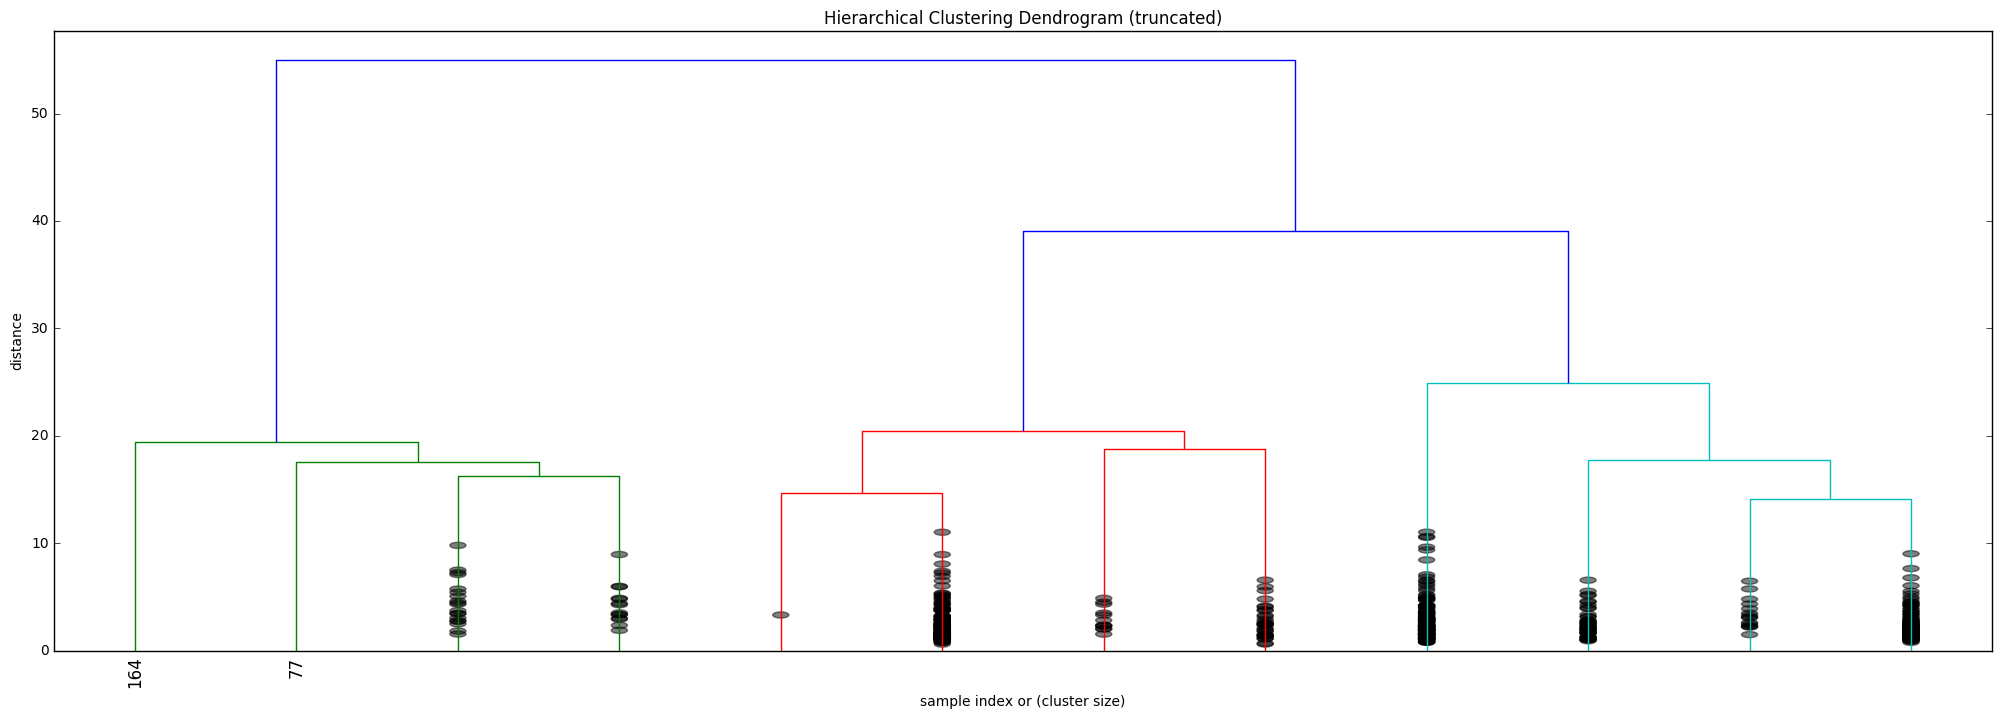

In [22]:
plt.figure(figsize=(25, 8))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [23]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

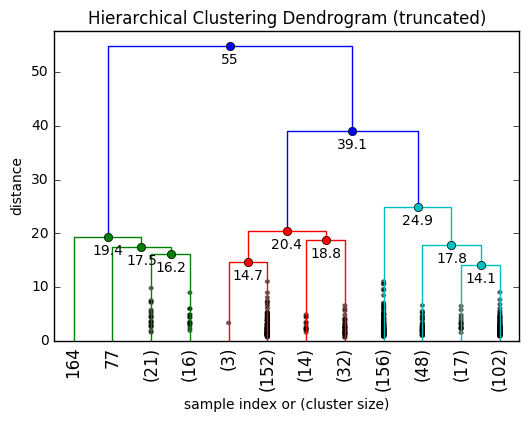

In [24]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

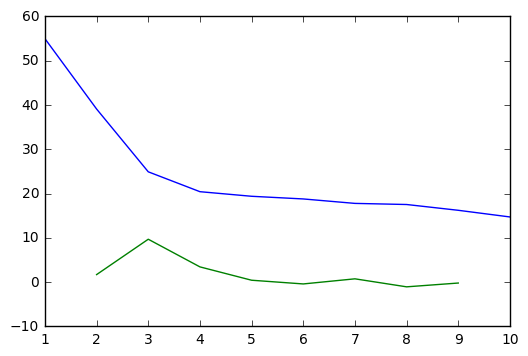

clusters: 3


In [25]:
## Elbow Method

last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)

In [26]:
from scipy.cluster.hierarchy import fcluster
max_d = 35
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 1, 1, 3, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 1, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 1, 3, 3, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2,
       2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 1, 3, 2, 3, 2, 1, 1, 1, 3, 3, 2, 1, 1, 1, 1, 3, 1, 1, 2, 1,
       3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3,
       3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3,
       3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3,

In [27]:
from collections import defaultdict
cluster_dict = defaultdict(list)
for i, c in enumerate(clusters):
    cluster_dict[c].append(i)
print(cluster_dict)

defaultdict(<class 'list'>, {1: [14, 15, 22, 77, 80, 125, 134, 164, 169, 170, 171, 175, 176, 177, 178, 180, 181, 183, 263, 306, 325, 330, 341, 363, 366, 413, 414, 415, 417, 420, 426, 428, 429, 430, 431, 438, 439, 442, 562], 2: [1, 3, 7, 10, 11, 18, 20, 25, 26, 27, 28, 32, 33, 34, 35, 37, 40, 41, 43, 45, 52, 53, 54, 55, 61, 67, 72, 79, 81, 82, 87, 91, 94, 97, 99, 102, 104, 111, 115, 117, 118, 121, 122, 128, 129, 130, 131, 132, 135, 136, 137, 138, 139, 140, 143, 144, 145, 147, 148, 151, 152, 154, 155, 156, 157, 158, 159, 160, 161, 162, 166, 168, 174, 182, 185, 189, 192, 193, 194, 198, 199, 200, 203, 204, 208, 213, 217, 222, 224, 226, 232, 234, 237, 241, 242, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 262, 265, 270, 274, 282, 283, 284, 286, 289, 291, 293, 295, 297, 299, 301, 302, 304, 307, 308, 310, 311, 312, 313, 314, 316, 317, 319, 320, 323, 326, 331, 335, 337, 342, 343, 344, 347, 351, 359, 373, 375, 381, 383, 390, 397, 401, 402, 405, 409, 411, 416, 424, 425, 432, 437, 